# TTI109 - Estatística - Atividade em duplas - 13.10.22

In [196]:
#@title Identificação
Nome_1 = "Fernando Freitas de Oliveira" #@param {type:"string"}
RA_1 = "19.00468-0" #@param {type:"string"}
Nome_2 = "Eduardo Cunha Santiago" #@param {type:"string"}
RA_2 = "22.00009-7" #@param {type:"string"}

In [197]:
#@title Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# Questão 01 (2,5 pontos)

O tempo de espera (em dias) para um transplante renal, para pessoas com idade entre 35 e 49 anos, pode ser aproximado por uma distribuição normal, como pode ser visto na figura a seguir (*Adaptado de: Organ Procurement and Transplantation Network*).

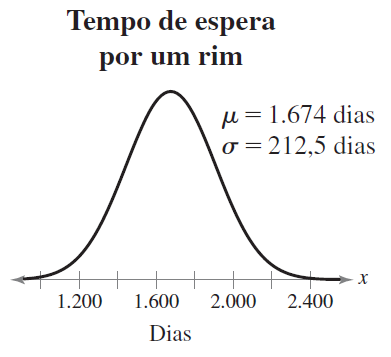

**(a)** Qual tempo de espera representa o 80º percentil?

**(b)** Qual tempo de espera representa o primeiro quartil?

**(c)** Qual é o menor tempo de espera que pode estar nos 10% maiores tempos de espera?

**(d)** Qual é maior tempo de espera por transplante que pode estar nos menores 5% tempos de espera?

In [198]:
''' Célula para resolução da Q1
Forneça respostas arredondadas ao inteiro mais próximo'''
media, desv_pad = 1674, 212.5
normpad = st.norm(loc=media,scale=desv_pad)

per_80 = normpad.ppf(0.8)
print(f"O 80 percentil é {per_80:.0f}")

quart_1 = normpad.ppf(0.25)
print(f"O primeiro quartil é {quart_1:.0f}")

m10 = normpad.ppf(1-0.1)
print(f"O menor tempo de espera para estar entre os 10% maior é {m10:.0f}")

m05 = normpad.ppf(0.05)
print(f"O maior tempo de espera por transplante que pode estar no 5% menores é {m05:.0f}")

O 80 percentil é 1853
O primeiro quartil é 1531
O menor tempo de espera para estar entre os 10% maior é 1946
O maior tempo de espera por transplante que pode estar no 5% menores é 1324


# Questão 02 (2,5 pontos)

O valor médio de terras e construções por acre para fazendas no Colorado é de US$ 1.170. Uma amostra aleatória de 32 fazendas do Colorado é selecionada. Qual é a probabilidade de que ocorra valor médio de terras e construções por acre:

**(a)** menor que US$ 1.200,

**(b)** maior que US$ 1.275 e

**(c)** entre US$\$$ 1.100 e US$\$$ 1.250?

Suponha que o desvio padrão populacional é conhecido e vale $\sigma$ = US$ 200 (Adaptado de: *U.S. Department of Agriculture*).

In [199]:
''' Célula para resolução da Q2 - Forneça respostas com 2 casas decimais'''

media,desv_pad, n = 1170, 200, 32
mu_x, std_x = media, desv_pad/(n**(1/2))
terras = st.norm(mu_x, std_x)

prob_1 = terras.cdf(1200)
print(f"A probabilidade de que seja menor que US$ 1200 é {prob_1*100:.2f} %")

prob_2 = terras.sf(1275)
print(f"A probabilidade de que seja maior que US$ 1275 é {prob_2*100:.2f} %")

prob_3 = terras.sf(1100) - terras.sf(1250)
print(f"A probabilidade de ser entre US$ 1100 e US$ 1250 é {prob_3*100:.2f} %")



A probabilidade de que seja menor que US$ 1200 é 80.19 %
A probabilidade de que seja maior que US$ 1275 é 0.15 %
A probabilidade de ser entre US$ 1100 e US$ 1250 é 96.43 %


# Questão 03 (2,5 pontos)

Uma amostra aleatória dos preços de
fechamento de ações para uma companhia em um ano
recente é mostrada a seguir.

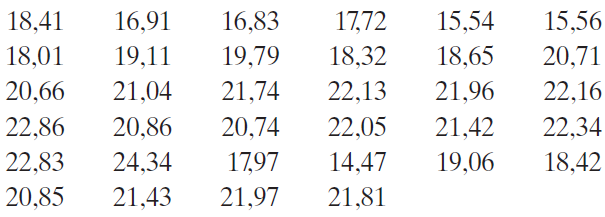

**(a)** Suponha que o desvio padrão populacional $\sigma$ é de US\$ 2,62. Nessa condição, construa um intervalo de 95% de confiança para a média populacional $\mu$.

**(b)** Refaça o item anterior, admitindo que o desvio populacional $\sigma$ não é conhecido.

In [200]:
# Conjunto de dados
dados = pd.Series([18.41, 16.91, 16.83, 17.72, 15.54, 15.56,
                   18.01, 19.11, 19.79, 18.32, 18.65, 20.71,
                   20.66, 21.04, 21.74, 22.13, 21.96, 22.16,
                   22.86, 20.86, 20.74, 22.05, 21.42, 22.34,
                   22.83, 24.34, 17.97, 14.47, 19.06, 18.42,
                   20.85, 21.43, 21.97, 21.81])
''' Célula para resolução da Q3
Forneça respostas com 2 casas decimais e utilize como variáveis para os
intervalos de confiança:
IC_a --> item (a)
IC_b --> item (b)'''
from scipy import stats as st
#Média conhecida
x_barra = dados.mean()
# Desvio padrão populacional conhecido
sigma = 2.62
# Nível de confiança
confianca = 0.95
# Desvio padrão da distribuiução normal das médias amostrais
n_amostras = len(dados)
sigma_x = sigma/n_amostras**0.5
# Intervalo de confiança de 95% para a média populacional
IC_a = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)
print('*** Intervalo de conficança 95% para a média populacional (Questão A)***')
print(f'({IC_a[0]:.2f}, {IC_a[1]:.2f})')


# Níveis de confiança
niveis = 0.95
# Atributos da distribuição
x_barra, std_amostral = dados.mean(),dados.std()
num_amostras = len(dados)
graus_liberdade = num_amostras - 1
# Intervalo de confiança para a média populacional
IC_b = st.t.interval(alpha=niveis, df=graus_liberdade, loc=x_barra,
                            scale=std_amostral/num_amostras**0.5) 
# Exibição dos intervalos
print('*** Intervalo de conficança 95% para a média populacional (Questão B) ***')
print(f'({IC_b[0]:.2f}, {IC_b[1]:.2f})')



*** Intervalo de conficança 95% para a média populacional (Questão A)***
(19.08, 20.84)
*** Intervalo de conficança 95% para a média populacional (Questão B) ***
(19.12, 20.80)


C:\Users\ferna\AppData\Local\Temp\ipykernel_12064\4109588972.py:24: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  IC_a = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)
C:\Users\ferna\AppData\Local\Temp\ipykernel_12064\4109588972.py:36: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  IC_b = st.t.interval(alpha=niveis, df=graus_liberdade, loc=x_barra,


**(c)** Execute a célula a seguir e explique a diferença entre os comprimentos dos intervalos de confiança dos itens anteriores.

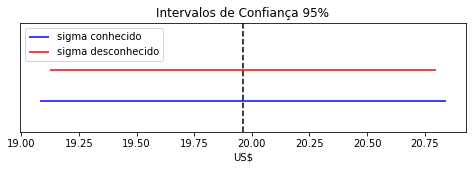

In [201]:
# Representação gráfica
plt.figure(figsize=(8,2))
plt.hlines(0.5, IC_a[0], IC_a[1], colors='b')
plt.hlines(1.0, IC_b[0], IC_b[1], colors='r')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 1.75)
plt.vlines(x_barra, 0, 1.75, colors='k', linestyles='dashed')
plt.title('Intervalos de Confiança 95%')
plt.xlabel('US$')
plt.legend(['sigma conhecido', 'sigma desconhecido'], loc='upper left')
plt.show()

In [202]:
#@title Resposta
Resp_Q3_c = 'Pois a margem de erro é calulada de forma diferente e quando temos o desvio padrão conhecido temos uma reposta com maior precisão, já que o desvio padrão de uma amostra é diferente para diferentes amostras' #@param {type:"string"}
display(Resp_Q3_c)

'Pois a margem de erro é calulada de forma diferente e quando temos o desvio padrão conhecido temos uma reposta com maior precisão, já que o desvio padrão de uma amostra é diferente para diferentes amostras'

# Questão 04 (2,5 pontos)

As espessuras (em polegadas) de 15 arruelas,
produzidas por uma máquina e selecionadas aleatoriamente, estão listadas a seguir.

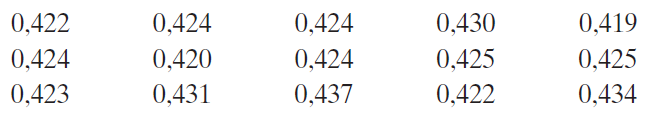

Use um nível de confiança de 95% e construa um intervalo de confiança para:

**(a)** A variância populacional

**(b)** O desvio padrão populacional


In [203]:
# Conjunto de dados
arruelas = pd.Series([0.422, 0.424, 0.424, 0.430, 0.419,
                      0.424, 0.420, 0.424, 0.425, 0.425,
                      0.423, 0.431, 0.437, 0.422, 0.434])
''' Célula para resolução da Q4 - Forneça respostas com 6 casas decimais'''
# Função para o cálculo do IC
def intconf_variancia(amostras, confianca, s_amostral):
  # Distribuição chi-quadrado
  distchi2 = st.chi2(df=amostras-1)
  # Determinação dos valores críticos
  x2L = distchi2.ppf((1-confianca)/2)
  x2R = distchi2.ppf((1+confianca)/2)
  # Extremos do IC para variância
  inf = (amostras-1)*s_amostral**2/x2R
  sup = (amostras-1)*s_amostral**2/x2L
  return (inf, sup)

# Intervalos de confiança
amostras, confianca, desvpad = len(arruelas), 0.95, arruelas.std()
# Lista de intervalos de confiança
ICsigma2 = intconf_variancia(amostras, confianca, desvpad)
# Exibição dos IC para variância e desvio padrão
print(f'- Nível de confiança de {confianca*100}%:')
print(f'(A) Variância: ({ICsigma2[0]:.6f}, {ICsigma2[1]:.6f})')
print(f'(B) Desvio Padrão: ({ICsigma2[0]**0.5:.6f}, {ICsigma2[1]**0.5:.6f})')

- Nível de confiança de 95.0%:
(A) Variância: (0.000014, 0.000065)
(B) Desvio Padrão: (0.003752, 0.008081)
